In [1]:
#IMport baseline libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df = pd.read_csv('Telco-Customer-w_15.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,30,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1890,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1841,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,307,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6845,No
7043,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,NaN,...,No,No,No,No,One year,No,Mailed check,49.55,476,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872,No


PartA
• Analyse the dataset and identify the task to be performed whether it is regression or 
classification.


# Confirming whether its a regression or classification Class

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,30,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1890,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1841,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes


The Task can be both CLassicitaion Task and /or regression Task using Churn or Total Charges respectively.

# Cleaning Data/ Exploratory Data Analysis

In [4]:
df.shape

(7046, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7046.000000,7028.000000,7041.000000
mean,0.162078,32.295817,64.737608
std,0.368548,24.546683,30.090674
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Checking for NUll Values

df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7043,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       5
TotalCharges         0
Churn                0
dtype: int64

In [8]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,30,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1890,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1841,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,307,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6845,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872,No


In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,30,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1890,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1841,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,307,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6845,No
7043,8865-TNMNX,Male,0,Yes,Yes,10.0,Yes,No,DSL,NaN,...,No,No,No,No,One year,No,Mailed check,49.55,476,No
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872,No


In [11]:
#Getting the outliers using IQR SCORE Method

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeniorCitizen      0.00
tenure            46.00
MonthlyCharges    54.35
dtype: float64


In [13]:
#Removing the outliers

print("Old data set shape with Outliers ",df.shape)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New data set shape without Outliers ",df_out.shape)

Old data set shape with Outliers  (7046, 21)
New data set shape without Outliers  (5904, 21)


<ipython-input-13-f35a1a389fb7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-13-f35a1a389fb7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [15]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1.0,34.0,2.0,45.0,2.0
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [16]:
df.Churn.value_counts()

No     5177
Yes    1869
Name: Churn, dtype: int64

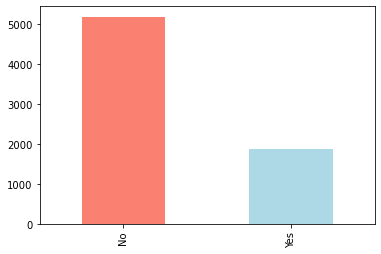

In [17]:
df["Churn"].value_counts().plot(kind="bar", 
                                 color = ["salmon", "lightblue"]);

# Encoding the Data

In [18]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [19]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7046 non-null   category
 1   gender            7046 non-null   category
 2   SeniorCitizen     7046 non-null   int64   
 3   Partner           7046 non-null   category
 4   Dependents        7046 non-null   category
 5   tenure            7028 non-null   float64 
 6   PhoneService      7046 non-null   category
 7   MultipleLines     7046 non-null   category
 8   InternetService   7046 non-null   category
 9   OnlineSecurity    7018 non-null   category
 10  OnlineBackup      7046 non-null   category
 11  DeviceProtection  7046 non-null   category
 12  TechSupport       7046 non-null   category
 13  StreamingTV       7046 non-null   category
 14  StreamingMovies   7046 non-null   category
 15  Contract          7046 non-null   category
 16  PaperlessBilling  7046 n

In [21]:
# Check missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       5
TotalCharges         0
Churn                0
dtype: int64

In [22]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [23]:
# Check again if there's any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [24]:
df.isna().sum()

customerID                    0
gender                        0
SeniorCitizen                 0
Partner                       0
Dependents                    0
tenure                        0
PhoneService                  0
MultipleLines                 0
InternetService               0
OnlineSecurity               28
OnlineBackup                  0
DeviceProtection              0
TechSupport                   0
StreamingTV                   0
StreamingMovies               0
Contract                      0
PaperlessBilling              0
PaymentMethod                 0
MonthlyCharges                0
TotalCharges                  0
Churn                         0
tenure_is_missing             0
MonthlyCharges_is_missing     0
dtype: int64

In [25]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [26]:
df.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
customerID,5376,3963,2565,5536,6512,6552,1003,4771,5605,4535,...,2701,3482,4845,5195,2385,4424,4293,4657,3829,5804
gender,1,2,2,2,1,1,2,1,1,2,...,1,2,1,2,2,1,2,1,2,1
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
Partner,2,1,1,1,1,1,1,1,2,1,...,2,2,2,1,1,2,1,1,1,1
Dependents,1,1,1,1,1,1,2,1,1,2,...,1,1,2,1,1,2,1,1,1,1
tenure,1.0,34.0,2.0,45.0,2.0,8.0,22.0,10.0,28.0,62.0,...,71.0,2.0,27.0,1.0,1.0,72.0,5.0,46.0,34.0,11.0
PhoneService,1,2,2,1,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
MultipleLines,2,1,1,2,1,3,3,2,3,1,...,3,1,1,1,1,3,1,1,3,3
InternetService,1,1,1,1,2,2,2,1,2,1,...,2,2,1,3,1,2,2,2,2,2
OnlineSecurity,1,3,3,3,1,1,1,3,1,3,...,3,1,3,2,0,3,1,1,1,1


In [27]:

len(df)

7046

# Save preprocessed data

In [28]:
# Export current tmp dataframe
df.to_csv("Telco-Customer-w_15_new.csv",
              index=False)

In [29]:
# Import preprocessed data
df = pd.read_csv("Telco-Customer-w_15_new.csv")
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
customerID,5376,3963,2565,5536,6512,6552,1003,4771,5605,4535,6872,5289,5752,175,3616,2557,5821,7020,2938,2929
gender,1,2,2,2,1,1,2,1,1,2,2,2,2,2,2,1,1,2,1,1
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Partner,2,1,1,1,1,1,1,1,2,1,2,1,2,1,1,2,1,1,2,1
Dependents,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,2,1,2,2,1
tenure,1.0,34.0,2.0,45.0,2.0,8.0,22.0,10.0,28.0,62.0,13.0,16.0,58.0,49.0,25.0,69.0,52.0,71.0,10.0,21.0
PhoneService,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2
MultipleLines,2,1,1,2,1,3,3,2,3,1,1,1,3,3,1,3,1,3,1,1
InternetService,1,1,1,1,2,2,2,1,2,1,1,3,2,2,2,2,3,2,1,2
OnlineSecurity,1,3,3,3,1,1,1,3,1,3,3,2,1,1,3,3,2,3,1,1


In [30]:
df.isna().sum()

customerID                     0
gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
tenure_is_missing              0
MonthlyCharges_is_missing      0
customerID_is_missing          0
gender_is_missing              0
Partner_is_missing             0
Dependents_is_missing          0
PhoneService_is_missing        0
MultipleLines_is_missing       0
InternetService_is_missing     0
OnlineSecu

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

# 1. Data Splitting – Split the data into training and testing datasets

# Split Data into X and y

In [31]:
X = df.drop("Churn", axis = 1)
y= df ["Churn"]

In [32]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_is_missing,DeviceProtection_is_missing,TechSupport_is_missing,StreamingTV_is_missing,StreamingMovies_is_missing,Contract_is_missing,PaperlessBilling_is_missing,PaymentMethod_is_missing,TotalCharges_is_missing,Churn_is_missing
0,5376,1,0,2,1,1.0,1,2,1,1,...,False,False,False,False,False,False,False,False,False,False
1,3963,2,0,1,1,34.0,2,1,1,3,...,False,False,False,False,False,False,False,False,False,False
2,2565,2,0,1,1,2.0,2,1,1,3,...,False,False,False,False,False,False,False,False,False,False
3,5536,2,0,1,1,45.0,1,2,1,3,...,False,False,False,False,False,False,False,False,False,False
4,6512,1,0,1,1,2.0,2,1,2,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,5935,2,1,2,1,4.0,2,3,2,1,...,False,False,False,False,False,False,False,False,False,False
7042,2227,2,0,1,1,66.0,2,1,2,3,...,False,False,False,False,False,False,False,False,False,False
7043,6264,2,0,2,2,10.0,2,1,1,0,...,False,False,False,False,False,False,False,False,False,False
7044,6672,1,0,2,2,70.0,2,3,1,3,...,False,False,False,False,False,False,False,False,False,False


In [33]:
y

0       1
1       1
2       2
3       1
4       2
       ..
7041    2
7042    1
7043    1
7044    1
7045    1
Name: Churn, Length: 7046, dtype: int64

# Splitting Data into Train and Test Set

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
pd.get_dummies(df, columns=['customerID','gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup',
                           'DeviceProtection','TechSupport', 'StreamingTV', 'Contract','PaperlessBilling', 'PaymentMethod','TotalCharges','StreamingMovies'])

,SeniorCitizen,tenure,MonthlyCharges,Churn,tenure_is_missing,MonthlyCharges_is_missing,customerID_is_missing,gender_is_missing,Partner_is_missing,Dependents_is_missing,...,TotalCharges_3828,TotalCharges_3829,TotalCharges_3830,TotalCharges_3831,TotalCharges_3832,TotalCharges_3833,TotalCharges_3834,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3
0,0,1.0,29.85,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
1,0,34.0,56.95,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,53.85,2,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
3,0,45.0,42.30,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,70.70,2,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,1,4.0,74.40,2,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
7042,0,66.0,105.65,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
7043,0,10.0,49.55,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
7044,0,70.0,69.20,1,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0


# 2. Building 5 Models  with training dataset using Classification Method

    *Logistic Regression
    *KNearest Neighbor Classifier
    *Decision Tree Classiifier
    *Random ForestClassifier
    *Support Vector Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Building five Models Individually
    1.LOGISTIC REGRESSION

In [38]:
np.random.seed(42)

lr = LogisticRegression()
lr.fit (X_train, y_train)

lr.score=(X_test, y_test)

lr.score

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 185          693       1              0        2           1     1.0   
 5710        4467       1              0        2           1    70.0   
 960         1949       2              1        2           1     7.0   
 7026        6202       1              0        1           1     9.0   
 132         6059       2              0        1           1    67.0   
 ...          ...     ...            ...      ...         ...     ...   
 6368        1876       2              1        1           1     2.0   
 315         3549       2              0        2           2    51.0   
 2441        6385       1              1        1           1     2.0   
 5004        1397       1              0        2           1    64.0   
 1161        4150       2              0        1           2     1.0   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 185              1              2            

In [39]:
# Getting Cross Validation for Logistics Regression

cross_val_score(lr, X, y, cv = 5)

cross_val_score

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [40]:
np.mean(cross_val_score(lr, X, y, cv=5))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7988923284458069

# Making predictions using Logistics Regression model on test dataset


In [41]:
y_pred = lr.predict(X_test)

print(y_test)
print(y_pred)


185     2
5710    1
960     1
7026    2
132     1
       ..
6368    2
315     1
2441    1
5004    1
1161    2
Name: Churn, Length: 1410, dtype: int64
[2 1 1 ... 2 1 1]


In [42]:
print("Print CLassificaatio Report for Logistic Regression")
print (classification_report(y_test, y_pred))

Print CLassificaatio Report for Logistic Regression
              precision    recall  f1-score   support

           1       0.84      0.89      0.86      1036
           2       0.63      0.52      0.57       374

    accuracy                           0.79      1410
   macro avg       0.73      0.70      0.72      1410
weighted avg       0.78      0.79      0.78      1410



# Evaluating Logistic Regression Model

In [43]:
print(confusion_matrix(y_test, y_pred))

[[920 116]
 [179 195]]


array([[920, 116],
       [179, 195]], dtype=int64)

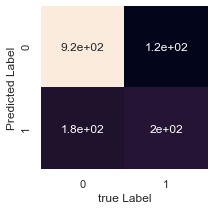

In [44]:
#Create a Heat map for the Confusion MAtrix

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False)
plt.xlabel("true Label")
plt.ylabel("Predicted Label")

cm = confusion_matrix(y_test, y_pred)
cm

In [45]:
# Checking Mean Squared Error for Logistics regression

from sklearn.metrics import mean_squared_error

print("Mean Squared  Error for Logistic regression:\n")
mean_squared_error(y_test, y_pred)

Mean Squared  Error for Logistic regression:



0.20921985815602837

# Calculate evaluation metrics using cross Validation

In [46]:
# Create a new classifier with best parameters
lr = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [47]:
# Cross-validated accuracy
lr_cv_acc = cross_val_score(lr, 
                         X, 
                         y, 
                         cv=5,
                         scoring="accuracy")
lr_cv_acc

array([0.8       , 0.80979418, 0.78779276, 0.81192335, 0.80056778])

In [48]:
lr_cv_acc.mean()

0.802015613910575

In [49]:
lr_cv_precision = cross_val_score(lr,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

lr_cv_precision

array([0.83963964, 0.84782609, 0.82798574, 0.84622302, 0.83303887])

In [50]:
lr_cv_precision.mean()

0.8389426714374583

In [51]:
lr_cv_recall = cross_val_score(lr,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

lr_cv_recall

array([0.8996139 , 0.9034749 , 0.89758454, 0.90917874, 0.91111111])

In [52]:
lr_cv_recall.mean()

0.9041926398448139

In [53]:
lr_cv_f1 = cross_val_score(lr,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
lr_cv_f1

array([0.86859273, 0.87476636, 0.86138155, 0.87657196, 0.87032764])

In [54]:
lr_cv_f1.mean()

0.8703280474051371

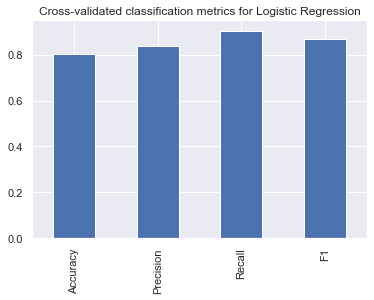

In [55]:
#Visualise cross-validated metrics  
cv_metrics = pd.DataFrame({"Accuracy": np.mean(lr_cv_acc),  
                          "Precision": np.mean(lr_cv_precision),  
                          "Recall": np.mean(lr_cv_recall),  
                          "F1": np.mean(lr_cv_f1)},
                        index=[0]) 
                          
                          
  
cv_metrics.T.plot.bar(title="Cross-validated classification metrics for Logistic Regression",  
                      legend=False);

# Building Five Models Individually
2. Knearest Neighbor Classifier

In [56]:
np.random.seed(42)

knn = KNeighborsClassifier()
knn.fit (X_train, y_train)

knn.score=(X_test, y_test)

knn.score

(      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 185          693       1              0        2           1     1.0   
 5710        4467       1              0        2           1    70.0   
 960         1949       2              1        2           1     7.0   
 7026        6202       1              0        1           1     9.0   
 132         6059       2              0        1           1    67.0   
 ...          ...     ...            ...      ...         ...     ...   
 6368        1876       2              1        1           1     2.0   
 315         3549       2              0        2           2    51.0   
 2441        6385       1              1        1           1     2.0   
 5004        1397       1              0        2           1    64.0   
 1161        4150       2              0        1           2     1.0   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 185              1              2            

In [57]:
# Getting Cross Validation for KNearest Neighbor

cross_val_score(knn, X, y, cv = 5)

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [58]:
np.mean(cross_val_score(knn, X, y, cv=5))

0.6976991880967841

# Making predictions using KNearest Neighor model on test dataset

In [59]:
y_pred = knn.predict(X_test)

print(y_test)
print(y_pred)

185     2
5710    1
960     1
7026    2
132     1
       ..
6368    2
315     1
2441    1
5004    1
1161    2
Name: Churn, Length: 1410, dtype: int64
[1 1 1 ... 1 1 1]


In [60]:
#Print lassification Report

print("Print CLassificaatio Report for KNearest Neighbor")
print (classification_report(y_test, y_pred))

Print CLassificaatio Report for KNearest Neighbor
              precision    recall  f1-score   support

           1       0.75      0.88      0.81      1036
           2       0.37      0.19      0.25       374

    accuracy                           0.70      1410
   macro avg       0.56      0.54      0.53      1410
weighted avg       0.65      0.70      0.66      1410



# Evaluating KNearest Neighbor Model

In [61]:
print(confusion_matrix(y_test, y_pred))

[[914 122]
 [303  71]]


array([[914, 122],
       [303,  71]], dtype=int64)

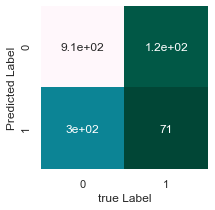

In [62]:
#Create a Heat map for the Confusion MAtrix on KNearest Neighbor

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False,
                   cmap  = 'PuBuGn_r')
plt.xlabel("true Label")
plt.ylabel("Predicted Label")

cm1 = confusion_matrix(y_test, y_pred)
cm1

In [63]:
# Checking Mean Squared Error

from sklearn.metrics import mean_squared_error

print("Mean Squared  Error for KNearest Neighbor:\n")
mean_squared_error(y_test, y_pred)

Mean Squared  Error for KNearest Neighbor:



0.30141843971631205

# Calculate evaluation metrics using cross Validation

In [64]:
# Create a new classifier with best parameters
knn = KNeighborsClassifier(n_neighbors=5,
    
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,)

In [65]:
# Cross-validated accuracy
knn_cv_acc = cross_val_score(knn, 
                         X, 
                         y, 
                         cv=5,
                         scoring="accuracy")
knn_cv_acc

array([0.70921986, 0.6941093 , 0.70759404, 0.68346345, 0.6941093 ])

In [66]:
knn_cv_acc.mean()

0.6976991880967841

In [67]:
knn_cv_precision = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

knn_cv_precision

array([0.75655738, 0.75062138, 0.75807788, 0.74562135, 0.74876442])

In [68]:
knn_cv_precision.mean()

0.7519284795362506

In [69]:
knn_cv_recall = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

knn_cv_recall

array([0.89092664, 0.87451737, 0.88405797, 0.86376812, 0.87826087])

In [70]:
knn_cv_recall.mean()

0.8783061943931509

In [71]:
knn_cv_f1 = cross_val_score(knn,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

knn_cv_f1

array([0.81826241, 0.80784663, 0.8162355 , 0.8003581 , 0.80835927])

In [72]:
knn_cv_f1.mean()

0.8102123844360506

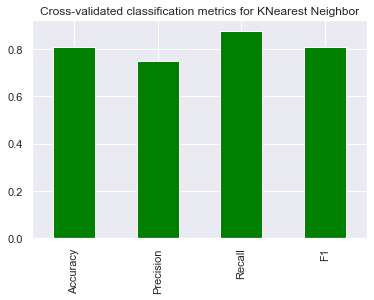

In [73]:
#Visualise cross-validated metrics for KNearest Neighbor  
cv_metrics = pd.DataFrame({"Accuracy": np.mean(knn_cv_f1),  
                          "Precision": np.mean(knn_cv_precision),  
                          "Recall": np.mean(knn_cv_recall),  
                          "F1": np.mean(knn_cv_f1)},
                        index=[0]) 
                          
                          
  
cv_metrics.T.plot.bar(title="Cross-validated classification metrics for KNearest Neighbor",  
                      color = 'Green',
                      legend=False);

# Building five Models Individually¶
3. Decision Tree Classifier

In [74]:
np.random.seed (42)

#Instantiating Model
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)

DTC.score=(X_test, y_test)

DTC.score

(      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 185          693       1              0        2           1     1.0   
 5710        4467       1              0        2           1    70.0   
 960         1949       2              1        2           1     7.0   
 7026        6202       1              0        1           1     9.0   
 132         6059       2              0        1           1    67.0   
 ...          ...     ...            ...      ...         ...     ...   
 6368        1876       2              1        1           1     2.0   
 315         3549       2              0        2           2    51.0   
 2441        6385       1              1        1           1     2.0   
 5004        1397       1              0        2           1    64.0   
 1161        4150       2              0        1           2     1.0   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 185              1              2            

In [75]:
# Getting Cross Validation for Decision Tree Classifier

cross_val_score(DTC, X, y, cv = 5)

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [76]:
np.mean(cross_val_score(DTC, X, y, cv=5))

0.7263700929687068

# Making predictions using Decision Tree Classifier model on test dataset

In [77]:
y_pred = DTC.predict(X_test)

print(y_test)
print(y_pred)

185     2
5710    1
960     1
7026    2
132     1
       ..
6368    2
315     1
2441    1
5004    1
1161    2
Name: Churn, Length: 1410, dtype: int64
[2 2 2 ... 1 2 1]


In [78]:
#Print Classification Report

print("Print CLassificaatio Report for Decison Tree Classifier")
print (classification_report(y_test, y_pred))

Print CLassificaatio Report for Decison Tree Classifier
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1036
           2       0.50      0.51      0.50       374

    accuracy                           0.74      1410
   macro avg       0.66      0.66      0.66      1410
weighted avg       0.74      0.74      0.74      1410



# Evaluating Decision Tree Classifier Model

In [79]:
print(confusion_matrix(y_test, y_pred))

[[847 189]
 [184 190]]


array([[847, 189],
       [184, 190]], dtype=int64)

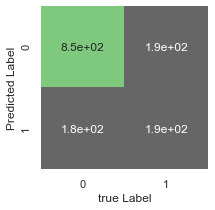

In [80]:
#Create a Heat map for the Confusion MAtrix on Decision Tree Classifier

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False,
                   cmap  = 'Accent_r')
plt.xlabel("true Label")
plt.ylabel("Predicted Label")

cm1 = confusion_matrix(y_test, y_pred)
cm1

In [81]:
# Checking Mean Squared Error

from sklearn.metrics import mean_squared_error

print("Mean Squared  Error fpr Decision Tree Classifier:\n")
mean_squared_error(y_test, y_pred)

Mean Squared  Error fpr Decision Tree Classifier:



0.2645390070921986

# Calculate evaluation metrics using cross Validation

In [82]:
# Create a new classifier with best parameters
DTC = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)

In [83]:
# Cross-validated accuracy
DTC_cv_acc = cross_val_score(DTC, 
                         X, 
                         y, 
                         cv=5,
                         scoring="accuracy")
DTC_cv_acc

array([0.72624113, 0.72320795, 0.72746629, 0.72107878, 0.72888573])

In [84]:
DTC_cv_acc.mean()

0.7253759771277853

In [85]:
# Cross-validated accuracy
DTC_cv_precision = cross_val_score(DTC, 
                         X, 
                         y, 
                         cv=5,
                         scoring="precision")
DTC_cv_precision

array([0.82242063, 0.81863231, 0.83032129, 0.8113392 , 0.82341463])

In [86]:
DTC_cv_precision.mean()

0.8212256123721116

In [87]:
# Cross-validated accuracy
DTC_cv_recall = cross_val_score(DTC, 
                         X, 
                         y, 
                         cv=5,
                         scoring="recall")
DTC_cv_recall

array([0.80598456, 0.80888031, 0.78937198, 0.8115942 , 0.81835749])

In [88]:
DTC_cv_recall.mean()

0.8068377072724899

In [89]:
# Cross-validated accuracy
DTC_cv_f1 = cross_val_score(DTC, 
                         X, 
                         y, 
                         cv=5,
                         scoring="f1")
DTC_cv_f1

array([0.8054741 , 0.80842724, 0.81025136, 0.8102366 , 0.81809339])

In [90]:
DTC_cv_f1.mean()

0.8104965357164817

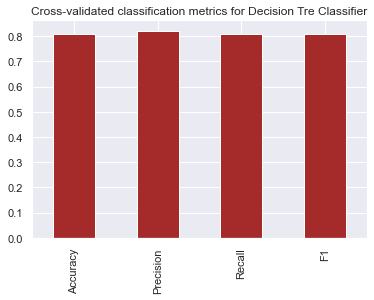

In [91]:
#Visualise cross-validated metrics for Decison Tree Classifier
cv_metrics = pd.DataFrame({"Accuracy": np.mean(DTC_cv_f1),  
                          "Precision": np.mean(DTC_cv_precision),  
                          "Recall": np.mean(DTC_cv_recall),  
                          "F1": np.mean(DTC_cv_f1)},
                        index=[0]) 
                          
                          
  
cv_metrics.T.plot.bar(title="Cross-validated classification metrics for Decision Tre Classifier",  
                      color = 'Brown',
                      legend=False);

# PLotting  the Tree Proper

[Text(235.29420479389634, 213.25846153846155, 'X[15] <= 1.5\ngini = 0.39\nsamples = 5636\nvalue = [4141, 1495]'),
 Text(163.33344711831992, 204.89538461538461, 'X[9] <= 1.5\ngini = 0.49\nsamples = 3077\nvalue = [1752, 1325]'),
 Text(80.86953753501652, 196.53230769230768, 'X[5] <= 7.5\ngini = 0.499\nsamples = 2087\nvalue = [1004, 1083]'),
 Text(44.88440305810946, 188.16923076923078, 'X[8] <= 1.5\ngini = 0.445\nsamples = 832\nvalue = [278, 554]'),
 Text(30.554452934204853, 179.80615384615385, 'X[18] <= 55.225\ngini = 0.498\nsamples = 337\nvalue = [159, 178]'),
 Text(27.00846053009625, 171.44307692307692, 'X[11] <= 2.0\ngini = 0.49\nsamples = 277\nvalue = [119, 158]'),
 Text(24.38945374227841, 163.07999999999998, 'X[5] <= 6.5\ngini = 0.496\nsamples = 254\nvalue = [116, 138]'),
 Text(20.305757075132885, 154.71692307692308, 'X[2] <= 0.5\ngini = 0.492\nsamples = 244\nvalue = [107, 137]'),
 Text(13.292680649331992, 146.35384615384615, 'X[16] <= 1.5\ngini = 0.498\nsamples = 213\nvalue = [99, 1

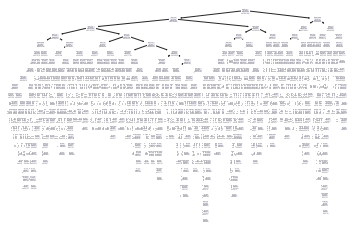

In [92]:
from sklearn import tree

DTC = DTC.fit(X_train, y_train)
tree.plot_tree(DTC)
#plt.savefig("Telco-Customer-w_15_new.jpg")

# Building five Models Individually¶
4. Random Forest Classifier

In [ ]:
np.random.seed(42)

rfc = RandomForestClassifier()
rfc.fit (X_train, y_train)

rfc.score=(X_test, y_test)

rfc.score

In [94]:
# Getting Cross Validation for Random Forest Classifier

cross_val_score(rfc, X, y, cv = 5)

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [95]:
np.mean(cross_val_score(rfc, X, y, cv=5))

0.7947762358495789

# Making predictions using Random Forest Classifier model on test data

In [96]:
y_pred = rfc.predict(X_test)

print(y_test)
print(y_pred)

185     2
5710    1
960     1
7026    2
132     1
       ..
6368    2
315     1
2441    1
5004    1
1161    2
Name: Churn, Length: 1410, dtype: int64
[2 1 1 ... 2 1 1]


In [97]:
#Print lassification Report

print("Print CLassificaation Report for Random Forest Classification")
print (classification_report(y_test, y_pred))

Print CLassificaation Report for Random Forest Classification
              precision    recall  f1-score   support

           1       0.82      0.91      0.86      1036
           2       0.64      0.46      0.54       374

    accuracy                           0.79      1410
   macro avg       0.73      0.68      0.70      1410
weighted avg       0.78      0.79      0.78      1410



# Evaluating Random Forest Classifier Model

In [98]:
print(confusion_matrix(y_test, y_pred))

[[941  95]
 [202 172]]


array([[941,  95],
       [202, 172]], dtype=int64)

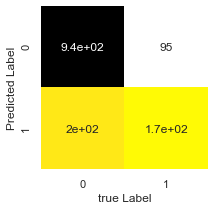

In [99]:
#Create a Heat map for the Confusion MAtrix on Random Forest Classifier

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False,
                   cmap  = 'gnuplot2_r')
plt.xlabel("true Label")
plt.ylabel("Predicted Label")

cm1 = confusion_matrix(y_test, y_pred)
cm1

In [100]:
# Checking Mean Squared Error for Random Forest Classifier

from sklearn.metrics import mean_squared_error

print("Mean Squared  Error for Random Forest Classifier:\n")
mean_squared_error(y_test, y_pred)

Mean Squared  Error for Random Forest Classifier:



0.21063829787234042

# Calculate evaluation metrics using cross Validation

In [101]:
DTC = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [102]:
# Cross-validated accuracy
rfc_cv_acc = cross_val_score(rfc, 
                         X, 
                         y, 
                         cv=5,
                         scoring="accuracy")
rfc_cv_acc

array([0.80496454, 0.79701916, 0.77643719, 0.79630944, 0.80340667])

In [103]:
rfc_cv_acc.mean()

0.7956274003493248

In [104]:
# Cross-validated accuracy
rfc_cv_precision = cross_val_score(rfc, 
                         X, 
                         y, 
                         cv=5,
                         scoring="precision")
rfc_cv_precision

array([0.83142101, 0.82327209, 0.82337199, 0.82952548, 0.83807829])

In [105]:
rfc_cv_precision.mean()

0.829133772316235

In [106]:
# Cross-validated accuracy
rfc_cv_recall = cross_val_score(rfc, 
                         X, 
                         y, 
                         cv=5,
                         scoring="recall")
rfc_cv_recall

array([0.91505792, 0.91216216, 0.89468599, 0.90917874, 0.91111111])

In [107]:
rfc_cv_recall.mean()

0.9084391845261411

In [108]:
# Cross-validated accuracy
rfc_cv_f1 = cross_val_score(rfc, 
                         X, 
                         y, 
                         cv=5,
                         scoring="f1")
rfc_cv_f1

array([0.86526123, 0.86912442, 0.85911602, 0.86550778, 0.87344685])

In [109]:
rfc_cv_f1.mean()

0.8664912597461587

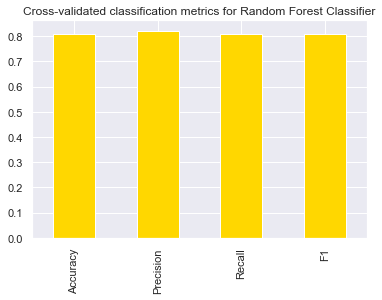

In [110]:
#Visualise cross-validated metrics for Decison Tree Classifier
rfc_cv_metrics = pd.DataFrame({"Accuracy": np.mean(rfc_cv_f1),  
                          "Precision": np.mean(rfc_cv_precision),  
                          "Recall": np.mean(rfc_cv_recall),  
                          "F1": np.mean(rfc_cv_f1)},
                        index=[0]) 
                          
                          
  
cv_metrics.T.plot.bar(title="Cross-validated classification metrics for Random Forest Classifier",  
                      color = 'Gold',
                      legend=False);

# Building five Models Individually
5. Support Vector Model

In [111]:
np.random.seed(42)

svc = SVC(kernel = 'rbf', degree = 2)
svc.fit (X_train, y_train)

svc.score=(X_test, y_test)

svc.score

(      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 185          693       1              0        2           1     1.0   
 5710        4467       1              0        2           1    70.0   
 960         1949       2              1        2           1     7.0   
 7026        6202       1              0        1           1     9.0   
 132         6059       2              0        1           1    67.0   
 ...          ...     ...            ...      ...         ...     ...   
 6368        1876       2              1        1           1     2.0   
 315         3549       2              0        2           2    51.0   
 2441        6385       1              1        1           1     2.0   
 5004        1397       1              0        2           1    64.0   
 1161        4150       2              0        1           2     1.0   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 185              1              2            

In [112]:
# Getting Cross Validation for Decision Tree Classifier

cross_val_score(svc, X, y, cv = 5)

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [113]:
svc_indices = svc.support_
print(svc_indices)

[   4    5   11 ... 5630 5631 5634]


# Making predictions using Random Forest Classifier model on test data

In [114]:
y_pred = svc.predict(X_test)

print(y_test)
print(y_pred)

185     2
5710    1
960     1
7026    2
132     1
       ..
6368    2
315     1
2441    1
5004    1
1161    2
Name: Churn, Length: 1410, dtype: int64
[1 1 1 ... 1 1 1]


In [115]:
#Print lassification Report

print("Print CLassificaation Report for Support Vector model")
print (classification_report(y_test, y_pred))

Print CLassificaation Report for Support Vector model
              precision    recall  f1-score   support

           1       0.73      1.00      0.85      1036
           2       0.00      0.00      0.00       374

    accuracy                           0.73      1410
   macro avg       0.37      0.50      0.42      1410
weighted avg       0.54      0.73      0.62      1410



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluating Support Vector Classifier Model

In [116]:
print(confusion_matrix(y_test, y_pred))

[[1036    0]
 [ 374    0]]


array([[1036,    0],
       [ 374,    0]], dtype=int64)

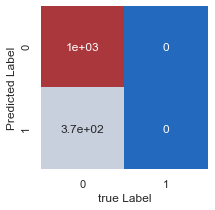

In [117]:
#Create a Heat map for the Confusion MAtrix on Supoort Vector Model

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(3,3))
ax= sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False,
                   cmap  = 'vlag')
plt.xlabel("true Label")
plt.ylabel("Predicted Label")

cm1 = confusion_matrix(y_test, y_pred)
cm1

In [118]:
# Checking Mean Squared Error for Support Vector Model

from sklearn.metrics import mean_squared_error

print("Mean Squared  Error for Suppot Vector Model:\n")
mean_squared_error(y_test, y_pred)

Mean Squared  Error for Suppot Vector Model:



0.2652482269503546

# Calculate evaluation metrics using cross Validation

In [119]:
svc = SVC(kernel = 'rbf', degree = 2)

In [120]:
# Cross-validated accuracy
svc_cv_acc = cross_val_score(svc, 
                         X, 
                         y, 
                         cv=5,
                         scoring="accuracy")
svc_cv_acc

array([0.73475177, 0.73527324, 0.73456352, 0.73456352, 0.73456352])

In [121]:
svc_cv_acc.mean()

0.7347431154332081

# Comparing the accuracy of all 5 models and selecting the best one

In [122]:
print("Accuracy of Logistic Regression:")
print(lr_cv_acc.mean()), 

print("Accuracy of KNearest Neighbor:")
print(knn_cv_acc.mean()),   

print("Accuracy of Decision Tree Classifier:")
print(DTC_cv_acc.mean()),   

print("Accuracy of Random Forest Classifier:")
print(rfc_cv_acc.mean()),   

print("Accuracy of Support Vector Classifier:")
print(svc_cv_acc.mean())

Accuracy of Logistic Regression:
0.802015613910575
Accuracy of KNearest Neighbor:
0.6976991880967841
Accuracy of Decision Tree Classifier:
0.7253759771277853
Accuracy of Random Forest Classifier:
0.7956274003493248
Accuracy of Support Vector Classifier:
0.7347431154332081


# Visualizing the 5 models CV accuracies

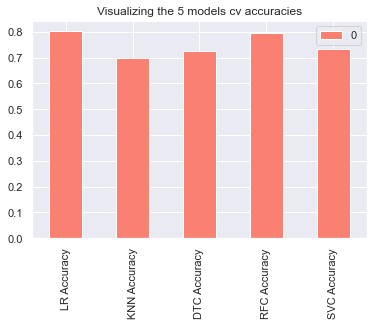

In [123]:
#Visualise cross-validated Accuracy for the 5 Models
cv_metrics = pd.DataFrame({"LR Accuracy": np.mean(lr_cv_acc), 
                          "KNN Accuracy": np.mean(knn_cv_acc),  
                          "DTC Accuracy": np.mean( DTC_cv_acc),  
                          "RFC Accuracy": np.mean(rfc_cv_acc),
                          "SVC Accuracy": np.mean(svc_cv_acc)},
                        index=[0]) 
                          
                          
cv_metrics.T.plot.bar(title="Visualizing the 5 models cv accuracies",  
                      color = ["salmon"],
                      legend=True);

# Base on the above, Logistics Regression and Random Forest are the best Models, I built these model without tuning the hyper parameters using GridSearch CV.

# Building five Models Individually

In this model, I want to build the five Models together in one fit.

    *Logistic Regression
    *KNearest Neighbor Classifier
    *Decision Tree Classiifier
    *Random ForestClassifier
    *Support Vector Model

In [131]:
# Put models in a dictionary
models = {"LR": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "DTC": DecisionTreeClassifier(),
          "RFC": RandomForestClassifier(),
          "SVC": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [132]:
model_scores = fit_and_score  (models =  models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)

model_scores

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7907801418439716,
 'KNN': 0.6985815602836879,
 'DTC': 0.7354609929078014,
 'RFC': 0.7886524822695036,
 'SVC': 0.7347517730496453}

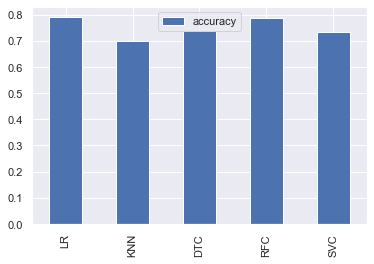

In [133]:
#Model Comparison
model_compare=pd.DataFrame(model_scores, 
                           index = ["accuracy"])

model_compare.T.plot.bar();

# Applying hyperparameter tuning using GridSearchCV for all the five (5) models.

In [136]:
#1. Grid Search CV for Logistics Regression

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
st_X = StandardScaler()
X = st_X.fit_transform(X)


In [175]:
parameters = {'penalty':['l1', 'l2']}        
c1 = LogisticRegression()
grid_c1 = GridSearchCV(c1, parameters, cv=10)
grid_c1.fit(X,y)
print(grid_c1.best_params_)
print(grid_c1.best_estimator_)
print(grid_c1.best_score_)

models.append(c1)   
scores.append(grid_c1.best_score_)  

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

{'penalty': 'l2'}
LogisticRegression()
0.8024435847840102


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80244358]
  warnings.warn(


In [176]:
#2. Grid Search CV for KNearestNeighbor Classifier

parameters = {'n_neighbors': range(40),
              'metric':['manhattan','euclidean']}        
c2 = KNeighborsClassifier()  
grid_c2 = GridSearchCV(c2, parameters, cv=10)
grid_c2.fit(X,y)
print(grid_c2.best_params_)
print(grid_c2.best_estimator_)
print(grid_c2.best_score_)

models.append(c2)    
scores.append(grid_c2.best_score_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details:

{'metric': 'manhattan', 'n_neighbors': 38}
KNeighborsClassifier(metric='manhattan', n_neighbors=38)
0.7926505077369439


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.72396236 0.75021599 0.75404336 0.77036811 0.76838048
 0.77774803 0.77590284 0.78030384 0.78001773 0.78328337 0.77803131
 0.78200516 0.77902664 0.78186916 0.7817253  0.78385336 0.78016219
 0.78158184 0.77973827 0.78143899 0.7798775  0.78271478 0.78257193
 0.78242988 0.78172046 0.78583736 0.78541123 0.78583656 0.78512734
 0.78683269 0.78697312 0.78981141 0.78612166 0.78938528 0.78654799
 0.7900957  0.78867565 0.79265051 0.78796684        nan 0.71856484
 0.74708918 0.74737186 0.763696   0.76411972 0.76426539 0.76611078
 0.77150488 0.7690895  0.77462625 0.77037093 0.77363657 0.77363576
 0.77647203 0.77561996 0.77575979 0.77519221 0.78044427 0.77874275
 0.78328478 0.77959381 0.77845886 0.77803232 0.78044709 0.77931073
 0.78200818 0.7814406  0.78456339 0.78158225 0.78129936 0.78328578
 0.78328619 0.78371051 0.78541385 0.78555549 0.7868324

In [178]:
#3. Grid Search CV for DecisionTree Classifier

parameters = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random']
              }        
c3 = DecisionTreeClassifier()
grid_c3 = GridSearchCV(c3, parameters, cv=10)
grid_c3.fit(X,y)
print(grid_c3.best_params_)
print(grid_c3.best_estimator_)
print(grid_c3.best_score_)

models.append(c3)  #models[c1,c2]
scores.append(grid_c3.best_score_) 

{'criterion': 'entropy', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', splitter='random')
0.7351684397163121


In [179]:
#4. Grid Search CV for RandomForest Classifier

parameters = {'n_estimators':range(20),
              'criterion':['gini','entropy']}        
c4 = RandomForestClassifier()  
grid_c4 = GridSearchCV(c4, parameters, cv=10)
grid_c4.fit(X,y)
print(grid_c4.best_params_)
print(grid_c4.best_estimator_)
print(grid_c4.best_score_)


models.append(c4)      
scores.append(grid_c4.best_score_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7255166  0.75276858 0.75546341 0.77973344 0.76908728
 0.77264124 0.76880903 0.7814404  0.78399581 0.78016401 0.77561916
 0.78200919 0.77661327 0.78683591 0.78825113 0.78257777 0.78995608
 0.78725943 0.78768677        nan 0.72084018 0.76000343 0.76114503
 0.77050774 0.77178594 0.77604731 0.77576161 0.78030545 0.78342501
 0.78441973 0.78129695 0.78526898 0.78413725 0.78782882 0.79109123
 0.78697433 0.78768496 0.7842803  0.79307805]
  warnings.warn(


{'criterion': 'entropy', 'n_estimators': 19}
RandomForestClassifier(criterion='entropy', n_estimators=19)
0.7930780544809799


In [180]:
#5. Grid Search CV for Support Vector Model Classifier

parameters = {'C': [0.01, 0.05],
              'degree': [2, 3],
              'gamma':[0.001, 0.01],
              'kernel': ['rbf']
              }        
c5 = SVC()
grid_c5 = GridSearchCV(c5, parameters, cv=10)
grid_c5.fit(X,y)
print(grid_c5.best_params_)
print(grid_c5.best_estimator_)
print(grid_c5.best_score_)

models.append(c5)   
scores.append(grid_c5.best_score_)

{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.05, degree=2, gamma=0.01)
0.7445351789168277


In [182]:
print("Score of LR Using GridSearch CV:")
print(grid_c1.best_score_)

print("Score of KNN Using GridSearch CV:")
print(grid_c2.best_score_)

print("Score of DTC Using GridSearch CV:")
print(grid_c3.best_score_)

print("Score of RFC Using GridSearch CV:")
print(grid_c4.best_score_)

print("Score of SVC Using GridSearch CV:")
print(grid_c5.best_score_)

Score of LR Using GridSearch CV:
0.8024435847840102
Score of KNN Using GridSearch CV:
0.7926505077369439
Score of DTC Using GridSearch CV:
0.7351684397163121
Score of RFC Using GridSearch CV:
0.7930780544809799
Score of SVC Using GridSearch CV:
0.7445351789168277


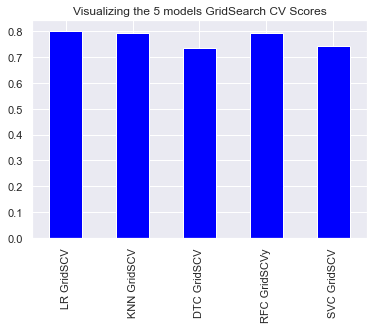

In [191]:
#Visualise GridSerach CV for the 5 Models
cv_metrics = pd.DataFrame({"LR GridSCV": grid_c1.best_score_, 
                          "KNN GridSCV": grid_c2.best_score_,  
                          "DTC GridSCV": grid_c3.best_score_,  
                          "RFC GridSCVy": grid_c4.best_score_,
                          "SVC GridSCV": grid_c5.best_score_},
                        index=[0]) 
                          
                          
cv_metrics.T.plot.bar(title="Visualizing the 5 models GridSearch CV Scores",  
                      color = ["blue"], 
                      legend=False);